**step-1**

**import the required packages**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Data1:Here we will take the data which follows normal distribution

- Data2:Based on above data we will create a another data by multiplying some value

- so that both data sets have multicollinearity

- The both datasets have some covariance

- Then we will apply PCA

- Will create 2 new PCs, will check the covariance matrix again

- so the PCs covariance should be zero


**create the data**

In [14]:
# will create a data having some collinearity
x=np.random.normal(200,10,500)  # mean =200, std=10,no.of observations
x.mean()

199.53421614540048

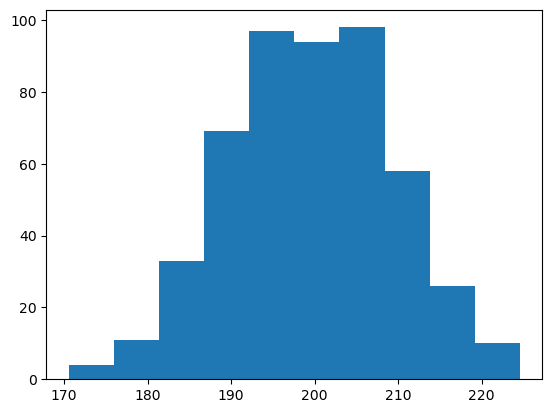

In [15]:
plt.hist(x)
plt.show()

In [16]:
# create a data y, should be correalate to x
y=0.5*x + np.random.normal(10,5,500)
# we are taking random samples
# and we are adding x data to the samples
print("mean:",y.mean())
print("std:",y.std())

mean: 109.69747990308058
std: 7.156721588427735


**step-3**
**perform the scatter plot**

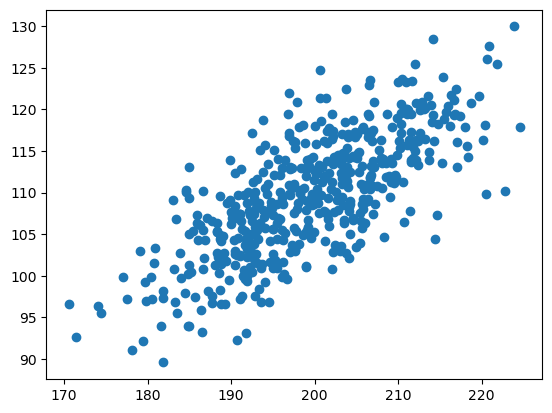

In [17]:
plt.scatter(x,y)
plt.show()

**observations**

- Both points are correalated each other

- Both points are not orthogonal to each other

- perform covariance matrix for better idea

**step-4 Covariance matrix**

In [18]:
cov_mat=np.cov(x,y)
cov_mat

array([[94.78410458, 51.37518247],
       [51.37518247, 51.32130651]])

<Axes: >

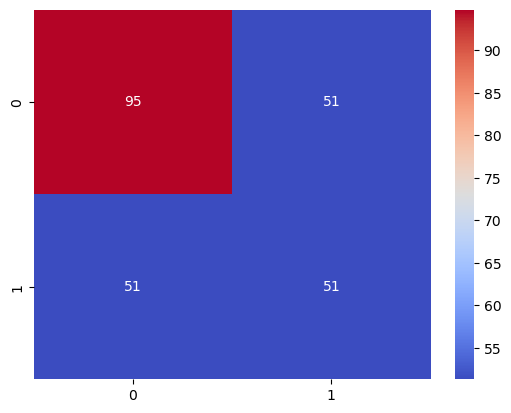

In [19]:
import seaborn as sns
sns.heatmap(cov_mat,annot=True,cmap='coolwarm')

In [20]:
# variance = 99.03
# variance=x
np.sum(np.square(x-np.mean(x)))/499

94.78410458451542

In [21]:
# cova(x,y)
a=x-np.mean(x)
b=y-np.mean(y)
np.sum(a*b)/499

51.37518246838094

**step perform PCA**

**will calculate eigen vectors and eigen values of covariance**

In [22]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [23]:
eig_vectors

array([[ 0.83353923, -0.55246027],
       [ 0.55246027,  0.83353923]])

In [24]:
eig_values

array([128.83498838,  17.27042271])

**Observations**

- we have two data samples x and  y, so we have **2x2 covariance matrix**

- when we apply eigen values and eigen vectors  on 2x2 cov matrix, will get **two eigen values and two eigen vectors**

- Eigen vectors will give the indication to **which direction data should flow**

- if u see eigen vectors the magnitude is same but the direction is different

- The dot product of eigen values either one or zero, indicates **orthogonally**

- Eigen value repeats how much data should flow through along that particular direction

**checkpoint-1**

- perform the dot product of two eigen vectors

- cos90 is zero

In [25]:
v1=eig_vectors[0]
v2=eig_vectors[1]

In [26]:
np.dot(v1,v2)

0.0

**checkpoint-2**

- Data variance along each direction

- we will use eigen values, each eigen value divided by sum of the eigen values

In [27]:
eig_values

array([128.83498838,  17.27042271])

In [28]:
127/(127+20), 20/(127+20)


(0.8639455782312925, 0.1360544217687075)

In [29]:
print("the variance percentage:",eig_values[0]*100/sum(eig_values))
print("the variance percentage:",eig_values[1]*100/sum(eig_values))

the variance percentage: 88.17947768952129
the variance percentage: 11.82052231047871


**step-6 Create a new PCs**

In [10]:
new data=old data*eigen vectors

SyntaxError: invalid syntax (3746638610.py, line 1)

In [30]:
z=np.vstack([x,y]).T
z

array([[201.73604   , 112.30409036],
       [196.15679777,  99.80298971],
       [199.80352228, 114.30294714],
       [209.26770913, 117.87603049],
       [217.36314126, 119.17036468],
       [190.80128535, 104.496631  ],
       [207.17153903, 120.95795657],
       [218.39015534, 114.25151019],
       [203.99785179, 117.06526708],
       [199.37873515, 113.2144979 ],
       [210.30820357, 118.24001723],
       [200.62481057, 121.3520605 ],
       [199.19867709, 105.8962926 ],
       [191.23979027, 112.9020851 ],
       [192.38085661, 104.85982984],
       [197.59233945, 111.09521458],
       [188.79971109, 101.37573443],
       [207.70422451, 115.11031866],
       [200.40142459, 108.72312475],
       [198.27255826, 110.29239882],
       [195.60614472, 113.98787234],
       [177.05225858,  99.83074325],
       [205.28568504, 114.84932062],
       [198.12719956, 117.89303229],
       [207.28978669, 108.57847136],
       [199.51555723, 104.50052671],
       [218.25945305, 115.55234444],
 

In [31]:
new_data=np.dot(z,eig_vectors)
new_data=pd.DataFrame(new_data, columns=['PC1','PC2'])
new_data
# under these two PC2 we will select pc1
# then ML model will develop on pc1

,PC1,PC2
0,230.198452,-17.841283
1,218.641573,-25.179131
2,229.691911,-15.107518
3,239.554669,-17.357800
4,247.017597,-20.751327
...,...,...
495,215.528063,-24.768474
496,221.692202,-19.417600
497,225.448228,-16.403366
498,223.072473,-21.447093


**step-7**

**checkpoint-3**

In [32]:
pc1=new_data['PC1'].values
pc2=new_data['PC2'].values
np.cov(pc1,pc2)

array([[ 1.28834988e+02, -2.63712454e-14],
       [-2.63712454e-14,  1.72704227e+01]])

**step-8 Scatter plot of new data**

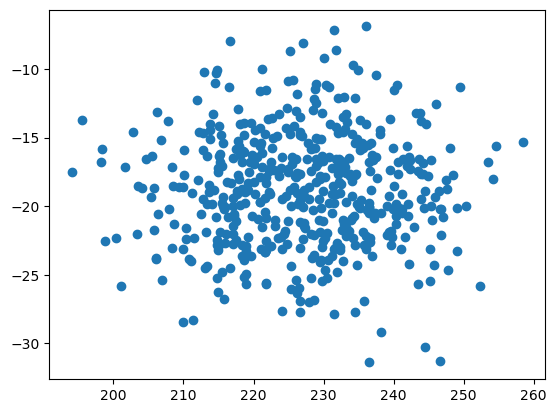

In [33]:
plt.scatter(new_data['PC1'],new_data['PC2'])
plt.show()

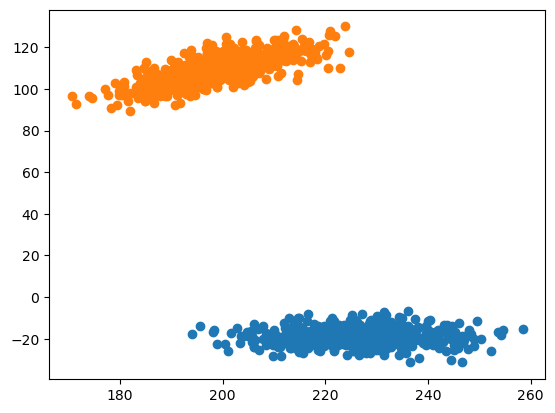

In [34]:
plt.scatter(new_data['PC1'],new_data['PC2'])
plt.scatter(x,y) # Orange # Correalation
plt.show()

**Observations**

- we create a new data has two pcs

- The two pcs includes old data

- The two pcs are independent each other

- The variance along PC1 is greater than PC2

- so we can choose only one component i.e.PC1

**Using package**

In [35]:
# import the packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [36]:
x=np.random.normal(200,10,500)
y=0.5*x + np.random.normal(10,5,500)
z=np.vstack([x,y]).T

In [37]:
pca=PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

In [ ]:
# pca.transform(z)

In [39]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

x=np.random.normal(200,10,500)
y=0.5*x + np.random.normal(10,5,500)
z=np.vstack([x,y]).T

pca=PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

**explained variance ratio**

- explained variance ratio is means variance percentage in each axis

In [40]:
pca.explained_variance_ratio_

array([0.89092513, 0.10907487])

**explained variance**

- It is same as eigen values

In [41]:
pca.explained_variance_

array([135.43809867,  16.58152081])

In [43]:
126.63714313/(126.63714313+20)

0.8636089085405247

- step-1:Covariance matrix of data

- step-2:We will calculate Eigen vectors and Eigen values

- step-3:Eigen vector will give the direction

- step-4:Eigen values will give the amount of variance

- step-5:PC1 and PC2 new axis will form based on eigen vectors

- step-6:Var(PC1)>>>Var(PC2):130.3107954, 15.61458758

- step-7:130/(130+15)=89%

Sklearn package These eigen values is called by explained_variance[126.63714313, 20.0074381]
Percentage of variance:126/126+20=by explained variance ratio

**perform on data**

In [44]:
data=pd.read_csv(r'C:\Users\sravani9\OneDrive\Documents\Naresh IT\Python sessions\Data_files\winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
X=data.drop('quality',axis=1)

- Total there are 12 columns

- 11 columns are input

- 1 column output

- we need to apply PCA on 11 columns

- PCA also gives 11 pc's, buy we can choose less features which covers maximum variance

- here we are choosing 6 pcs

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [47]:
pca_data=pca.transform(X)
len(pca_data[0]), len(pca_data)

(6, 1599)

In [48]:
new_data=pd.DataFrame(pca_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [49]:
new_data['quality']=data['quality']

In [50]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,quality
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,5
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,0.301325,5
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,0.205114,5
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,-0.089092,6
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,0.198018,5
...,...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,0.058238,5
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,-0.040335,6
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,-0.089513,6
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,-0.015548,5


In [51]:
pca.explained_variance_ratio_

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [52]:
np.sum(pca.explained_variance_ratio_)

0.9999615354947832

In [53]:
pca.explained_variance_

array([1.13380708e+03, 5.79354108e+01, 3.10130228e+00, 1.81941532e+00,
       1.04634036e+00, 4.13967294e-02])